<a href="https://colab.research.google.com/github/Mariyyah-Alrasheed/Exam_Week4/blob/main/Exam_Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

## Load the Data

In [2]:
df = pd.read_csv('/content/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [4]:
df.shape

(52000, 26)

In [5]:
df.sample(30)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
29102,337650.0,351980.0,-2.931849,53.061396,60,3.0,2,2.0,06/04/2011,4,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2011
22598,330570.0,137910.0,-2.993767,51.136179,52,3.0,1,1.0,05/06/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2009
20966,540970.0,184920.0,0.031589,51.545520,1,3.0,1,1.0,04/10/2005,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,No,2005
16786,361380.0,389330.0,-2.582312,53.399364,7,3.0,2,1.0,16/02/2012,5,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,1.0,No,2012
49646,313870.0,186480.0,-3.244180,51.570541,61,3.0,2,1.0,22/04/2009,4,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2009
13022,259300.0,664990.0,-4.249466,55.857550,97,3.0,1,1.0,14/03/2005,2,...,6,0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,No,2005
27480,542330.0,353420.0,0.122390,53.059059,32,3.0,1,1.0,05/01/2007,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Wet/Damp,2.0,Yes,2007
47929,436240.0,291950.0,-1.467291,52.524197,23,3.0,1,1.0,13/05/2009,4,...,-1,-1,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2009
13233,256582.0,131442.0,-4.048176,51.064293,50,3.0,2,1.0,14/07/2014,2,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2014
9278,443060.0,330590.0,-1.361729,52.871047,30,3.0,2,1.0,06/08/2006,1,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2006


In [6]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [7]:
df.duplicated().sum()

43

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,51957.000000,5.195700e+04,51957.000000,51957.000000,51957.000000,51635.000000,51957.000000,50916.000000,51957.000000,51957.000000,51957.000000,51957.000000,51957.000000,51957.000000,51957.000000,51869.000000,51957.000000
mean,440301.908732,2.997873e+05,-1.426935,52.586011,30.420675,2.837126,1.834248,1.354741,4.130531,349.740786,4.080605,997.082453,39.152280,2.672441,383.855592,1.359521,2009.399619
std,95122.549813,1.613581e+05,1.398435,1.453008,25.544462,0.402625,0.727877,0.855328,1.926296,259.489618,1.428098,1806.325567,14.214414,3.205267,1303.677163,0.479905,3.007291
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375572.000000,1.780100e+05,-2.365778,51.487627,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440990.000000,2.669800e+05,-1.390836,52.293412,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.000000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.980800e+05,-0.214421,53.477266,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,717.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [10]:
crri = df.corr(numeric_only=True)

<Axes: >

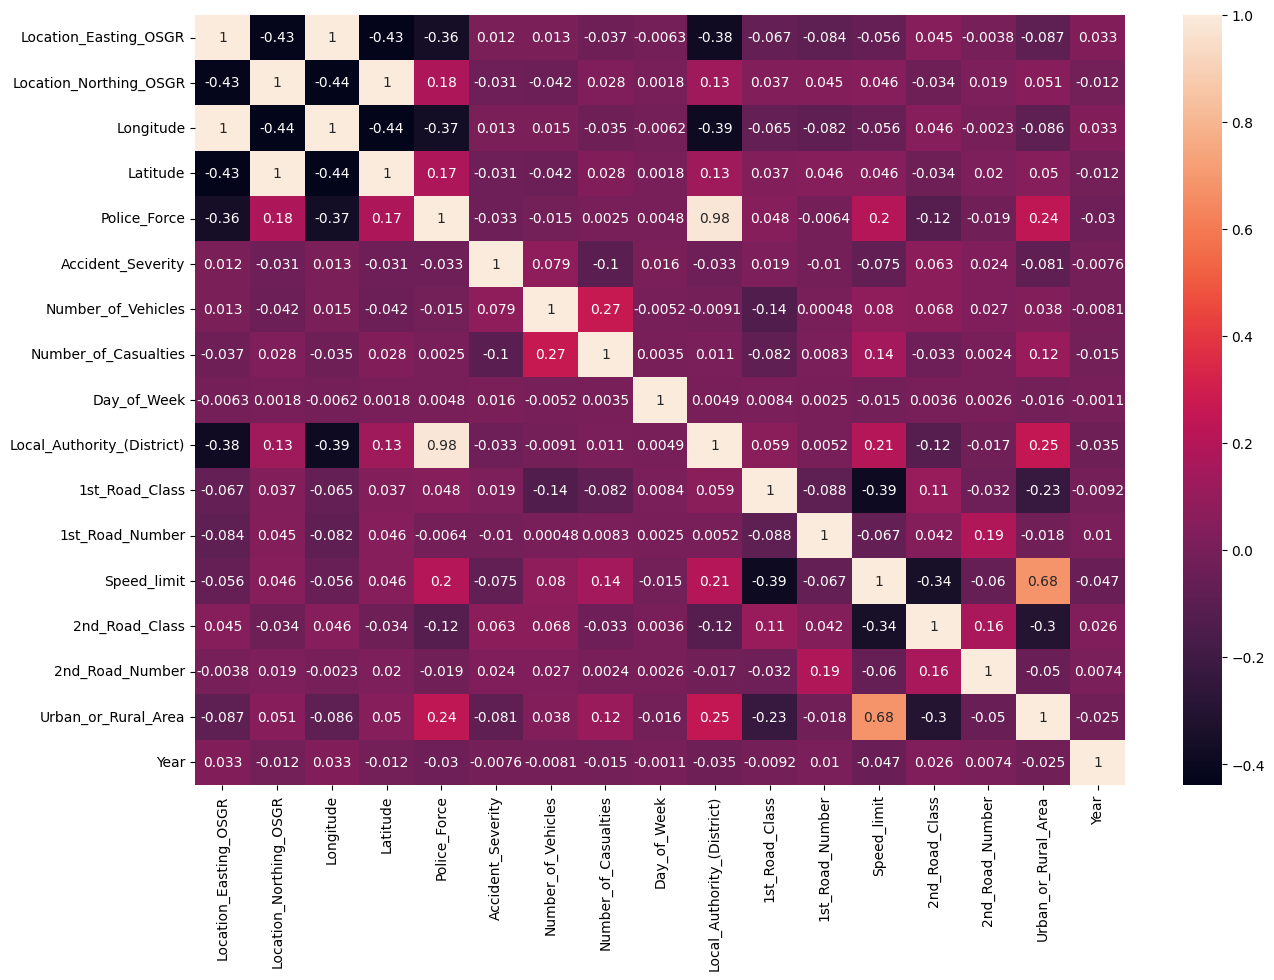

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(crri,annot=True)


In [12]:
df.sample()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
41586,403770.0,266080.0,-1.946157,52.292805,22,3.0,2,1.0,23/12/2007,1,...,6,0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Raining without high winds,Frost/Ice,1.0,Yes,2007


There is a stronge corrilation with some of column so we can remove one of them

In [13]:
def boxdraw(data):
    # Set the size of the plot
    plt.figure(figsize=(10, 6))

    # Iterate over each column in the DataFrame
    for col in data.columns:
        plt.figure()
        plt.boxplot(data[col])
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)
        plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51957 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        51957 non-null  float64
 1   Location_Northing_OSGR                       51957 non-null  float64
 2   Longitude                                    51957 non-null  float64
 3   Latitude                                     51957 non-null  float64
 4   Police_Force                                 51957 non-null  int64  
 5   Accident_Severity                            51635 non-null  float64
 6   Number_of_Vehicles                           51957 non-null  int64  
 7   Number_of_Casualties                         50916 non-null  float64
 8   Date                                         51957 non-null  object 
 9   Day_of_Week                                  51957 non-null  int64  
 10  Loc

In [15]:
df.dropna(inplace=True)

In [16]:
num_col = df.drop(columns=['Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities',
                           'Light_Conditions','Weather_Conditions','Road_Surface_Conditions',
                           'Date','Local_Authority_(Highway)','Road_Type'])

In [17]:
num_col.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Day_of_Week,0
Local_Authority_(District),0


{'whiskers': [<matplotlib.lines.Line2D at 0x7b4055e79ea0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b4055e7a3e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b4055e79c00>],
 'medians': [<matplotlib.lines.Line2D at 0x7b4055e7a920>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b4055e7abc0>],
 'means': []}

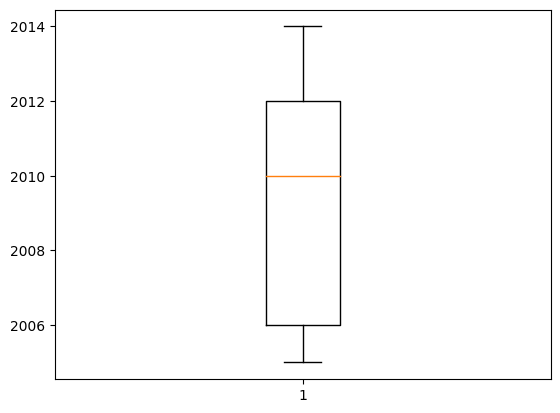

In [18]:
plt.boxplot(df['Year'])

<Figure size 1000x600 with 0 Axes>

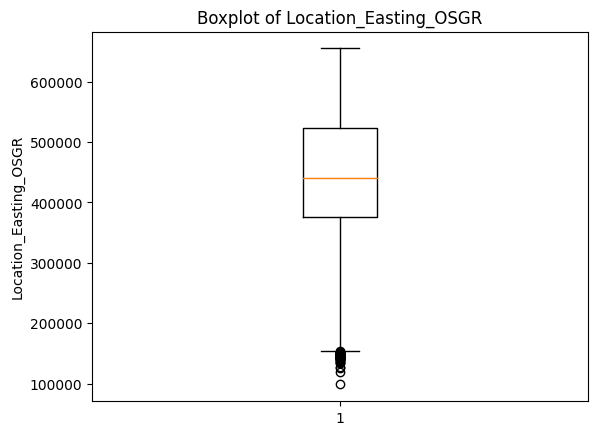

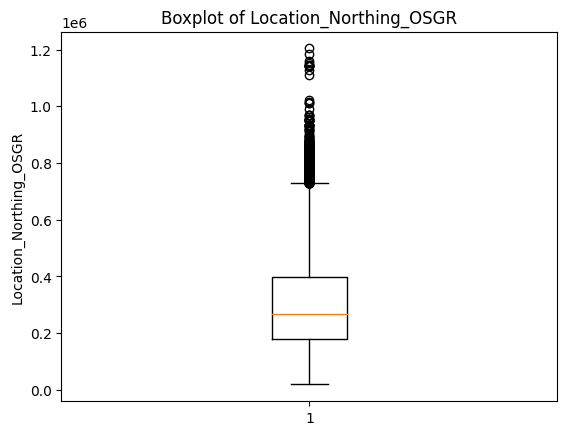

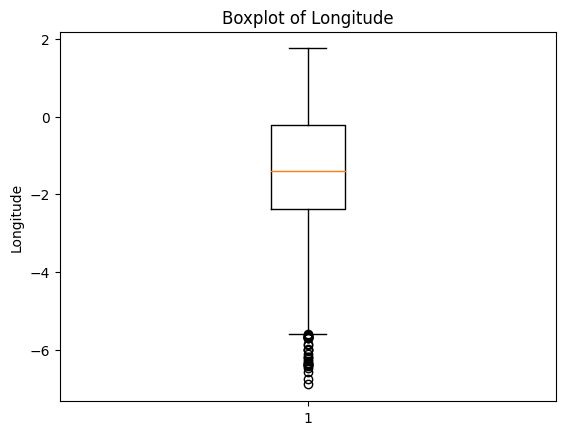

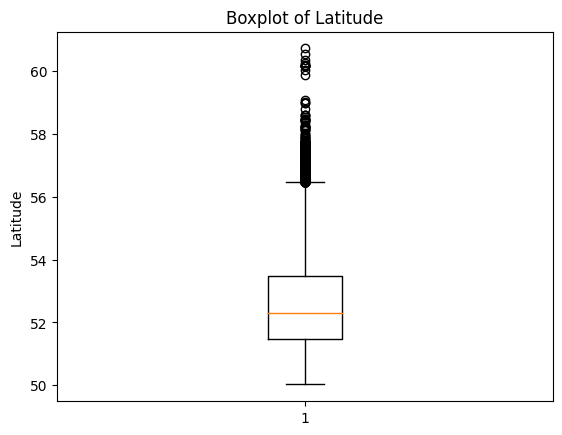

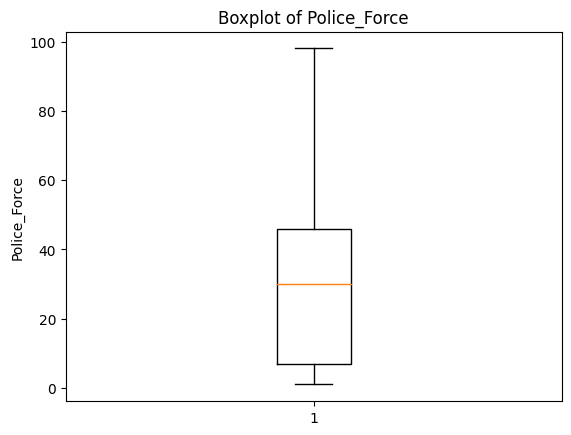

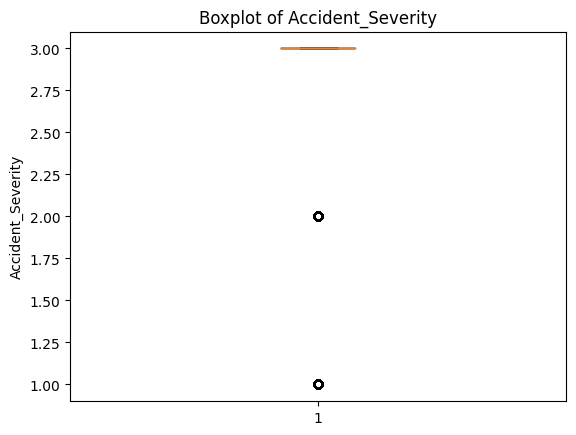

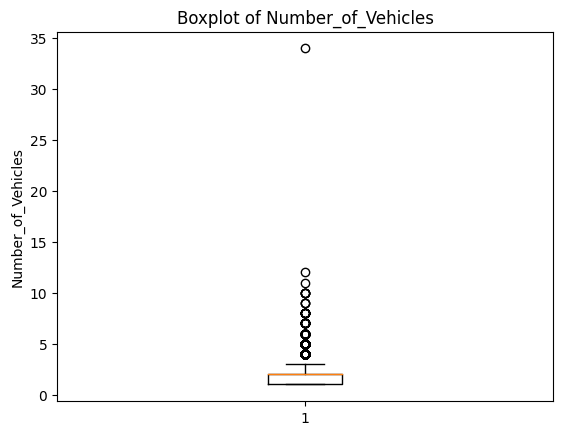

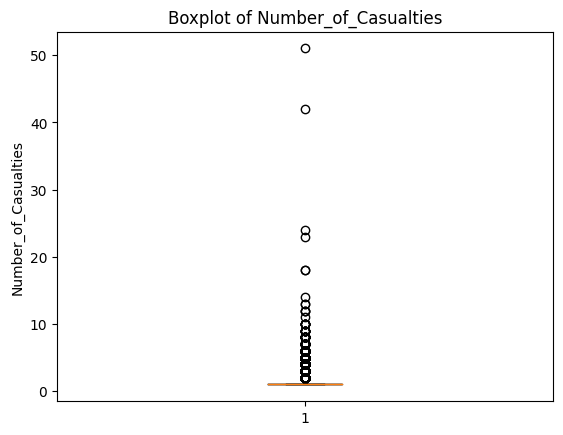

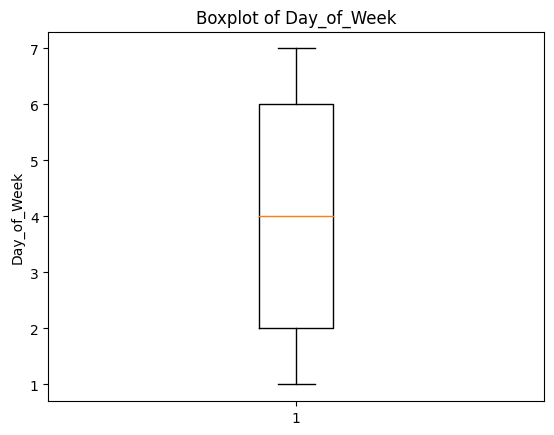

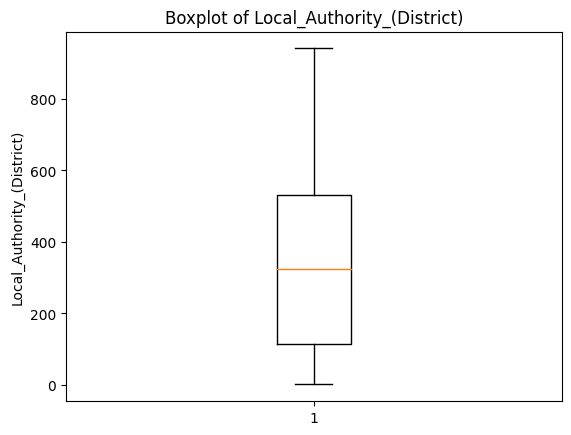

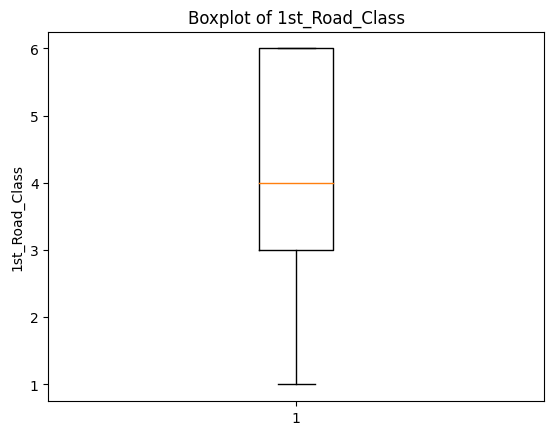

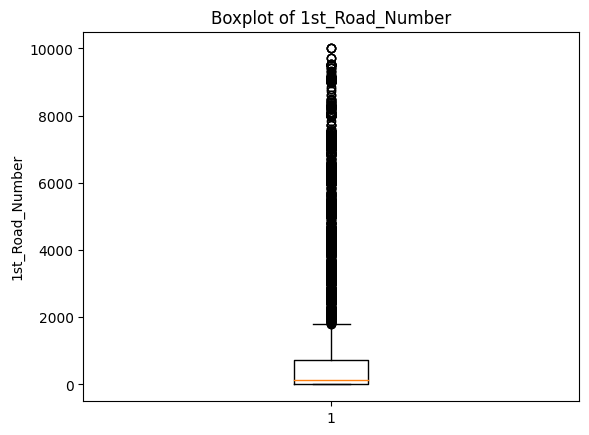

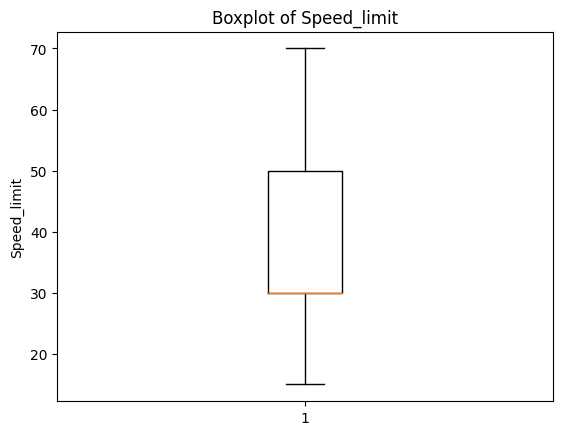

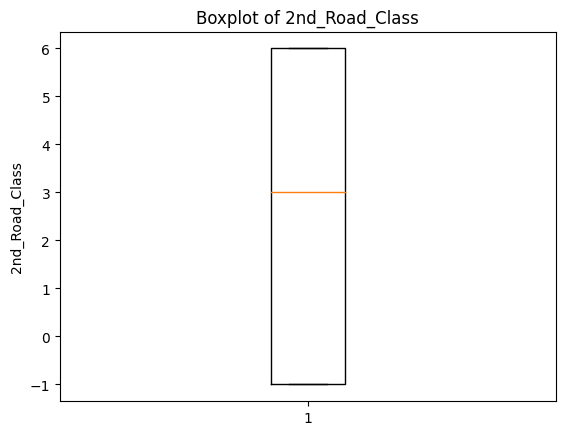

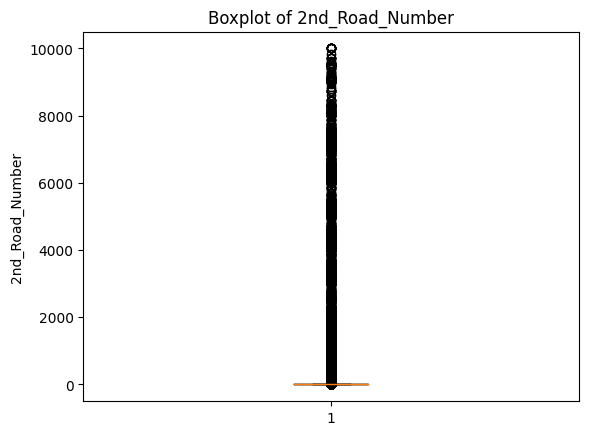

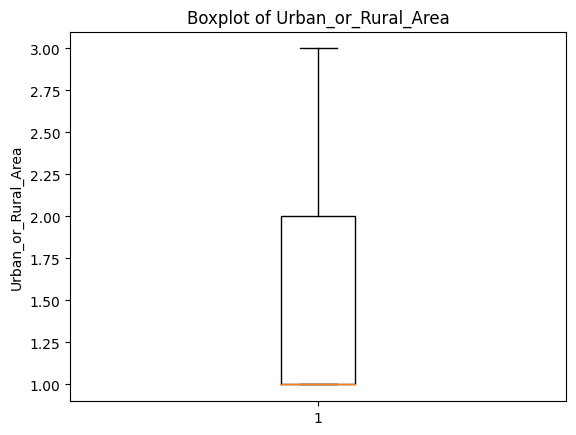

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

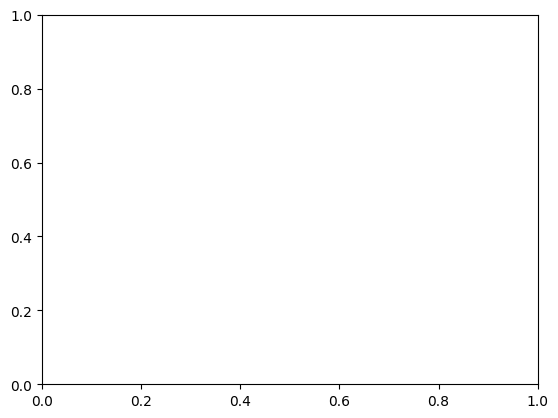

In [19]:
boxdraw(num_col)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b40562ec0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b40562ef6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b40562eff70>],
 'medians': [<matplotlib.lines.Line2D at 0x7b40562ee020>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b40562eeb30>],
 'means': []}

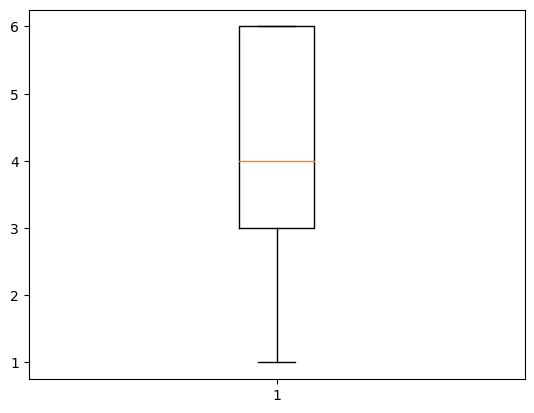

In [20]:
plt.boxplot(df['1st_Road_Class'])

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [21]:
def remove_outliers(data):
    for col in data.columns:
        if data[col].dtype in ['float64', 'int64']:
            # Calculate Q1, Q3, and IQR for each column
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1

            # Filter out outliers
            data = data[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]

    return data

# Example usage:
# cleaned_data = remove_outliers(your_dataframe)


In [22]:
remove_outliers(df)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
10,508230.0,429880.0,-0.359973,53.754047,16,3.0,1,1.0,06/04/2006,5,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2006
13,423560.0,424220.0,-1.644505,53.713866,13,3.0,2,1.0,09/09/2010,5,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2010
19,456650.0,302420.0,-1.164706,52.616576,33,3.0,2,1.0,14/01/2005,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,1.0,No,2005
21,532130.0,196100.0,-0.091611,51.648127,1,3.0,2,1.0,06/03/2005,1,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51974,354070.0,429530.0,-2.698174,53.760087,4,3.0,1,1.0,06/12/2007,5,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2007
51981,391350.0,389330.0,-2.131569,53.400711,6,3.0,2,1.0,23/12/2006,7,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2006
51985,385380.0,218380.0,-2.213737,51.863764,53,3.0,3,1.0,05/10/2006,5,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,1.0,Yes,2006
51987,549560.0,177680.0,0.152309,51.478257,1,3.0,2,1.0,27/01/2007,7,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Other,Dry,1.0,Yes,2007


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49986 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        49986 non-null  float64
 1   Location_Northing_OSGR                       49986 non-null  float64
 2   Longitude                                    49986 non-null  float64
 3   Latitude                                     49986 non-null  float64
 4   Police_Force                                 49986 non-null  int64  
 5   Accident_Severity                            49986 non-null  float64
 6   Number_of_Vehicles                           49986 non-null  int64  
 7   Number_of_Casualties                         49986 non-null  float64
 8   Date                                         49986 non-null  object 
 9   Day_of_Week                                  49986 non-null  int64  
 10  Loc

In [ ]:
# df = df.drop(columns=['Local_Authority_(District)','Location_Northing_OSGR','Location_Easting_OSGR','Date'])

In [24]:
df = df.drop(columns=['Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Human_Control'])

In [25]:
df = df.drop(columns=['Pedestrian_Crossing-Physical_Facilities'])

In [26]:
df.shape

(49986, 24)

In [27]:
df.sample(3)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
19792,301400.0,169200.0,-3.419222,51.413168,62,3.0,2,1.0,25/10/2005,3,...,Single carriageway,30,6,0,Darkeness: No street lighting,Fine with high winds,Dry,1.0,Yes,2005
28904,249440.0,665020.0,-4.406861,55.854841,97,3.0,1,1.0,14/02/2005,2,...,Single carriageway,30,6,0,Darkness: Street lights present and lit,Other,Frost/Ice,1.0,No,2005
1710,423416.0,323273.0,-1.654087,52.806481,21,3.0,3,1.0,30/07/2014,4,...,Single carriageway,30,6,36,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2014


In [28]:
df['lat_lon_interaction'] = df['Latitude'] * df['Longitude']

In [29]:
df['interaction_with_year'] = df['lat_lon_interaction'] * df['Year']
df['interaction_with_area'] = df['lat_lon_interaction'] * df['Urban_or_Rural_Area']


In [30]:
# df = df.drop(columns=['Latitude','Longitude'])

In [31]:
df.shape

(49986, 27)

In [32]:
df.sample(30)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,lat_lon_interaction,interaction_with_year,interaction_with_area
25535,382110.0,388670.0,-2.270503,53.394545,6,3.0,3,2.0,31/10/2007,4,...,0,Darkness: Street lighting unknown,Unknown,Dry,1.0,No,2007,-121.232475,-243313.576535,-121.232475
28341,537260.0,181800.0,-0.023095,51.518397,1,3.0,1,1.0,14/11/2009,7,...,0,Darkness: Street lights present and lit,Raining with high winds,Wet/Damp,1.0,Yes,2009,-1.189817,-2390.343114,-1.189817
15195,518628.0,468017.0,-0.187566,54.094389,16,3.0,1,1.0,11/07/2012,4,...,0,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012,-10.146268,-20414.291552,-10.146268
26645,403260.0,293930.0,-1.953371,52.543187,20,3.0,2,2.0,27/11/2009,6,...,4167,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,1.0,Yes,2009,-102.636338,-206196.402506,-102.636338
34252,272930.0,125730.0,-3.812994,51.016809,50,3.0,2,1.0,02/09/2006,7,...,0,Darkeness: No street lighting,Other,Wet/Damp,2.0,Yes,2006,-194.526787,-390220.733952,-389.053573
37633,233400.0,339200.0,-4.479788,52.924282,60,1.0,2,2.0,12/12/2005,2,...,0,Darkeness: No street lighting,Fine without high winds,Wet/Damp,2.0,Yes,2005,-237.089563,-475364.574641,-474.179127
5659,388720.0,419820.0,-2.172234,53.674721,4,3.0,2,1.0,13/03/2005,1,...,0,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,2005,-116.594054,-233771.078063,-233.188108
23714,506262.0,157445.0,-0.476964,51.306157,45,3.0,2,1.0,13/06/2013,5,...,2039,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2013,-24.471190,-49260.505203,-48.942380
50795,461820.0,408940.0,-1.067888,53.573419,14,3.0,2,1.0,14/02/2006,3,...,97,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2006,-57.210411,-114764.085006,-57.210411
37356,356530.0,308820.0,-2.644370,52.675305,22,3.0,2,1.0,29/05/2010,7,...,4394,Daylight: Street light present,Fine without high winds,Wet/Damp,2.0,No,2010,-139.292996,-279978.922529,-278.585993


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49986 entries, 0 to 51999
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        49986 non-null  float64
 1   Location_Northing_OSGR                       49986 non-null  float64
 2   Longitude                                    49986 non-null  float64
 3   Latitude                                     49986 non-null  float64
 4   Police_Force                                 49986 non-null  int64  
 5   Accident_Severity                            49986 non-null  float64
 6   Number_of_Vehicles                           49986 non-null  int64  
 7   Number_of_Casualties                         49986 non-null  float64
 8   Date                                         49986 non-null  object 
 9   Day_of_Week                                  49986 non-null  int64  
 10  Loc

In [34]:
df.shape

(49986, 27)

In [60]:
df_encoded = pd.get_dummies(df, columns=[
    'Local_Authority_(Highway)',
    'Road_Type',
    'Light_Conditions',
    'Weather_Conditions',
    'Road_Surface_Conditions',
    'Did_Police_Officer_Attend_Scene_of_Accident'
], drop_first=True)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_encoded[['1st_Road_Class', '1st_Road_Number', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number','Police_Force','Local_Authority_(District)','Location_Easting_OSGR','Location_Northing_OSGR']] = scaler.fit_transform(
    df_encoded[['1st_Road_Class', '1st_Road_Number', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number','Police_Force','Local_Authority_(District)','Location_Easting_OSGR','Location_Northing_OSGR']]
)

In [62]:
df_encoded = df_encoded.drop(columns='Date')

In [58]:
df_encoded

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Normal,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp
0,1.264202,-1.213186,0.277298,50.812789,0.647472,3.0,1,1.0,6,0.792977,...,True,False,False,False,False,True,False,False,False,False
1,0.721291,-0.697400,-0.430574,51.572846,-1.153660,3.0,2,1.0,1,-1.249553,...,False,False,False,False,False,False,False,False,False,False
2,-1.321327,-0.809210,-3.231459,51.414661,1.234798,3.0,2,1.0,4,1.525205,...,False,False,False,False,False,False,False,False,False,False
3,-1.035108,0.673319,-2.881800,53.568318,-1.036195,3.0,1,2.0,7,-1.026031,...,False,True,False,False,False,False,False,False,False,True
4,-0.564508,0.312355,-2.203020,53.047882,-0.370559,3.0,2,2.0,3,-0.359318,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,0.366827,0.122019,-0.888006,52.766777,0.099301,3.0,2,1.0,6,0.056896,...,False,False,False,False,False,False,False,False,False,False
51996,0.173041,-1.069966,-1.192915,51.040030,0.530007,3.0,1,1.0,4,0.584870,...,False,False,False,False,False,False,False,False,False,False
51997,1.053846,-0.913830,0.012032,51.252055,0.569162,3.0,3,1.0,3,0.638824,...,False,True,False,False,False,False,False,False,False,True
51998,-0.057720,0.212632,-1.485264,52.902301,-0.018164,3.0,2,2.0,6,-0.104965,...,False,True,False,False,False,False,False,False,False,True


In [50]:
from sklearn.decomposition import PCA


In [63]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_encoded)
pca_df = pd.DataFrame(data=data_pca)



In [ ]:
df['Accident_Severity']

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

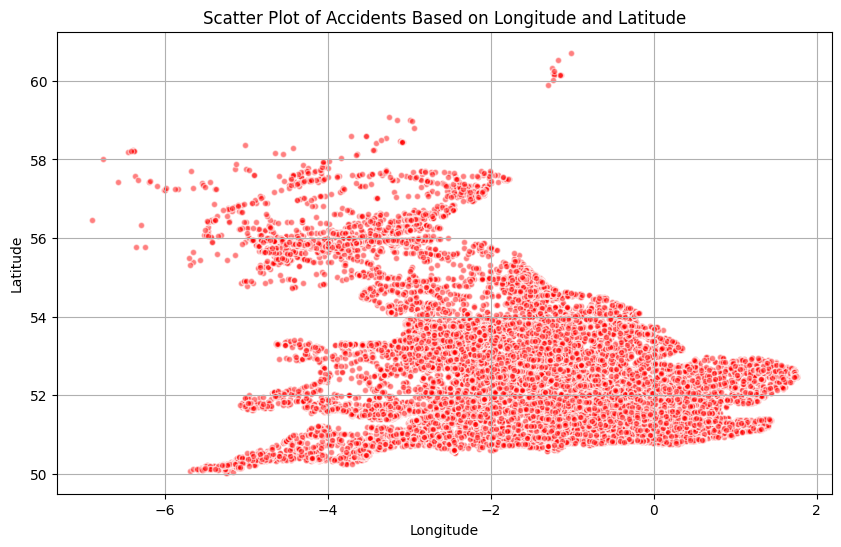

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, c='red', edgecolors='w', s=20)
plt.title('Scatter Plot of Accidents Based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [ ]:
pca_df

<ipython-input-66-4f8c347b00f5>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], cmap='viridis', alpha=0.5)


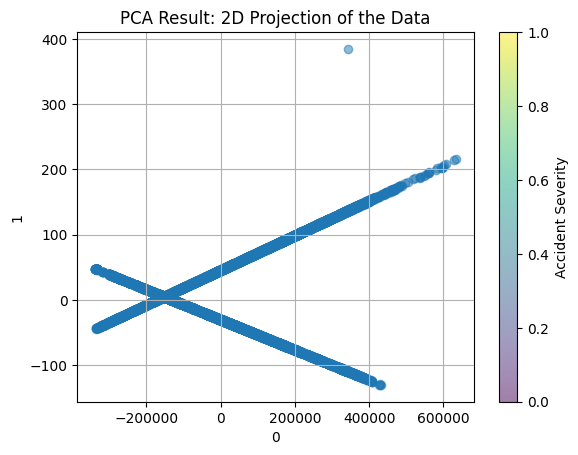

In [66]:
scatter = plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Accident Severity')
plt.title('PCA Result: 2D Projection of the Data')
plt.xlabel('0')
plt.ylabel('1')
plt.grid(True)
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [67]:
from sklearn.cluster import KMeans

In [ ]:
df.info()

In [ ]:
df_encoded

In [68]:
rang = range(1,10)

intieria = []

for k in rang:
  kmean = KMeans(n_clusters=k,random_state=42)
  kmean.fit_transform(df_encoded)
  intieria.append(kmean.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [74]:
rang = range(1,10)

intieria = []

for k in rang:
  kmean = KMeans(n_clusters=k,random_state=42)
  kmean.fit_transform(pca_df)
  intieria.append(kmean.inertia_)
  cluster_centers = kmean.cluster_centers_
  labels = kmean.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [69]:
intieria

[1126356999008611.8,
 365945548313084.8,
 164681622684129.62,
 105113525403460.52,
 68383900393964.11,
 45866067957631.5,
 35604658628913.23,
 29137362186464.93,
 23019922588947.133]

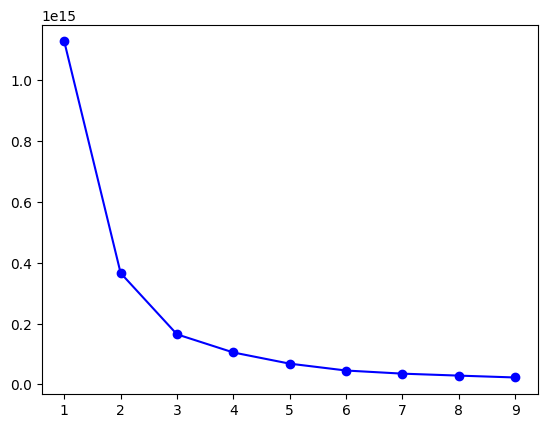

In [70]:
plt.plot(rang,intieria,'ob-')

In [ ]:
  # k = KMeans(n_clusters=3,random_state=42)
  # k.fit_transform(df_encoded)
  # labels = k.labels_
  # canter = k.cluster_centers_

In [ ]:
# pca_df

In [ ]:
# rang = range(1,10)
# pca_data = pca_df.values

# intieria = []

# for k in rang:
#   kmean = KMeans(n_clusters=k,random_state=42)
#   kmean.fit_predict(pca_data)
#   intieria.append(kmean.inertia_)
#   cluster_centers = kmeans.cluster_centers_
#   labels = kmean.labels_


In [ ]:
# pca_data = pd.DataFrame(pca_data)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [77]:
sco = silhouette_score(pca_df,labels)

In [78]:
sco

0.5523710942914347

## Plot the data points with their predicted cluster center

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='X', label='Cluster Centers')

# Add titles and labels
plt.title('Data Points and Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add color bar and legend
plt.colorbar(label='Cluster Label')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


KeyError: (slice(None, None, None), 0)

<Figure size 1000x600 with 0 Axes>

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

In [ ]:

by elmbo

 2- choice is 4

 3- silhouette_score

 4- DBSCAN